# Desirability Functions for Multi-Objective Optimization
This notebook demonstrates the use of desirability functions for multi-objective optimization. The desirability function is a scalar function that maps a vector of objective values to a scalar value, most often in the range [0, 1]. The desirability function is used to aggregate multiple objectives into a single objective value, e.g. by the multiplicative Sobo strategy.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from bofire.benchmarks.api import DTLZ2
from bofire.data_models.objectives import api as objectives_data_model

### Desirability Functions map from the input space to the range [0, 1], also by clipping after the bounds

In [8]:
objectives = {
    "Increasing": objectives_data_model.IncreasingDesirabilityObjective(bounds=(0., 5.)),
    "Decreasing": objectives_data_model.DecreasingDesirabilityObjective(bounds=(0., 5.)),
    "Peak": objectives_data_model.PeakDesirabilityObjective(bounds=(0., 5.), peak_position=2.5),
}

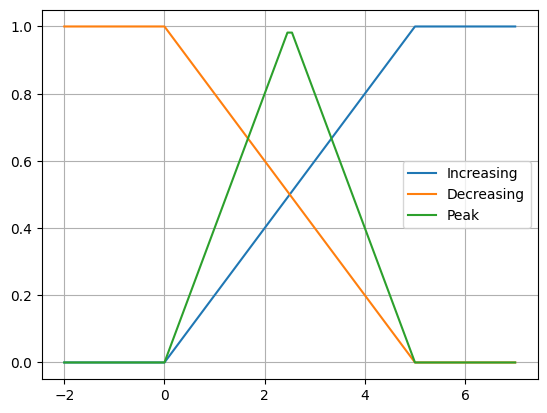

In [10]:
for key, objective in objectives.items():
    x = np.linspace(-2., 7., 100)
    y = objective(x, None)
    plt.plot(x, y, label=key)
plt.grid(True)
plt.legend()

### Clipping is optional, but leads to values outside the [0, 1] range

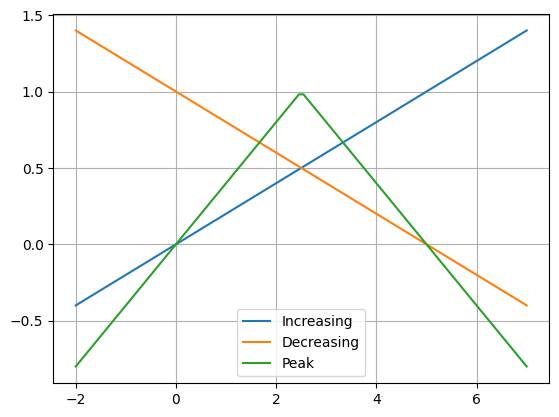

In [12]:
objectives = {
    "Increasing": objectives_data_model.IncreasingDesirabilityObjective(bounds=(0., 5.), clip=False),
    "Decreasing": objectives_data_model.DecreasingDesirabilityObjective(bounds=(0., 5.), clip=False),
    "Peak": objectives_data_model.PeakDesirabilityObjective(bounds=(0., 5.), peak_position=2.5, clip=False),
}
for key, objective in objectives.items():
    x = np.linspace(-2., 7., 100)
    y = objective(x, None)
    plt.plot(x, y, label=key)
plt.grid(True)
plt.legend()

### A concave or convex desirability function can be created by setting the `log_shape_factor`

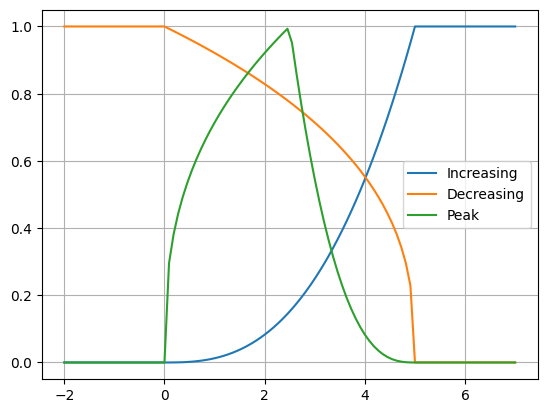

In [14]:
objectives = {
    "Increasing": objectives_data_model.IncreasingDesirabilityObjective(bounds=(0., 5.), 
                                                                        log_shape_factor=1.),
    "Decreasing": objectives_data_model.DecreasingDesirabilityObjective(bounds=(0., 5.), 
                                                                        log_shape_factor=-1.),
    "Peak": objectives_data_model.PeakDesirabilityObjective(bounds=(0., 5.), peak_position=2.5,
                                                            log_shape_factor=-1., 
                                                            log_shape_factor_decreasing=1.),
}
for key, objective in objectives.items():
    x = np.linspace(-2., 7., 100)
    y = objective(x, None)
    plt.plot(x, y, label=key)
plt.grid(True)
plt.legend()